In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
df = pd.read_csv("../data/BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.dropna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
537549,1004734,P00345842,M,51-55,1,B,1,1,2,8.0,14.0,13082
537551,1004735,P00313442,M,46-50,3,C,3,0,5,6.0,8.0,6863
537562,1004736,P00146742,M,18-25,20,A,1,1,1,13.0,14.0,11508
537571,1004737,P00221442,M,36-45,16,C,1,0,1,2.0,5.0,11852


Analyzing columns

In [6]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

Analyzing Gender

<Axes: ylabel='Ratio'>

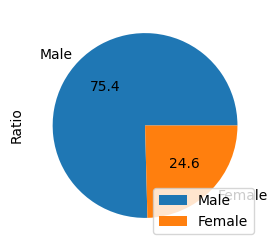

In [9]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]},
                    index = ['Male', 'Female'])

data.plot.pie(y = 'Ratio', figsize = (3,3), autopct = "%.1f")

<Axes: xlabel='Gender'>

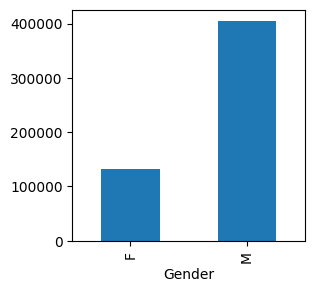

In [10]:
df.groupby('Gender').size().plot(kind = 'bar',
                                 figsize = (3,3))

In [11]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

Analyzing Age and Marital Status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

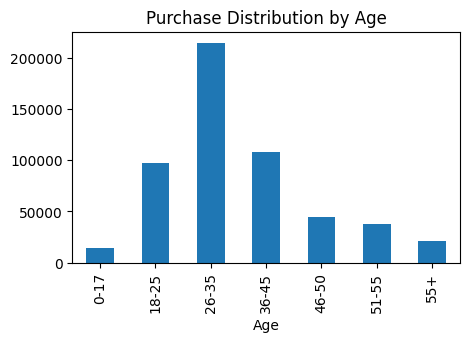

In [12]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (5, 3), title = 'Purchase Distribution by Age')

In [13]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])

data = pd.DataFrame(lst , columns = ['Age','Products'])

<Axes: xlabel='Age'>

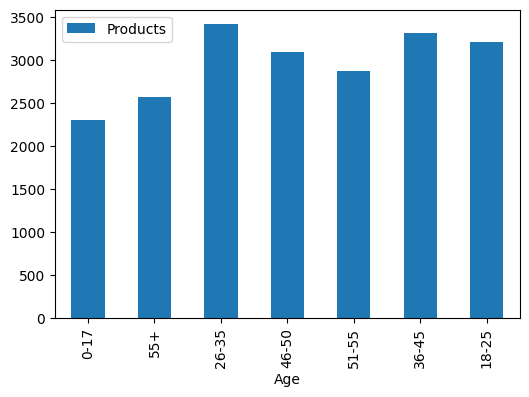

In [14]:
data.plot.bar(x = 'Age', figsize = (6,4))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

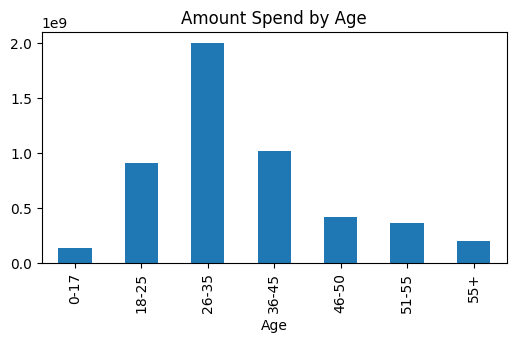

In [15]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (6, 3), title = 'Amount Spend by Age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

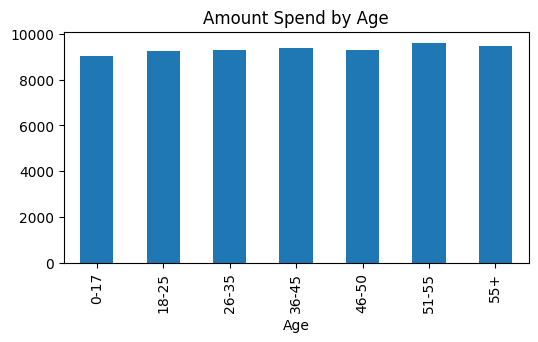

In [16]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'bar', figsize = (6,3), title = 'Amount Spend by Age')

<Axes: ylabel='Purchase'>

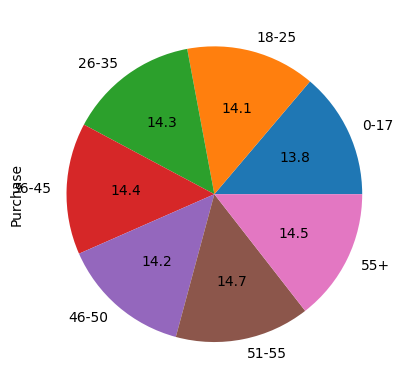

In [17]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

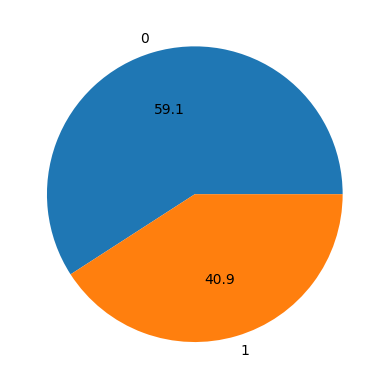

In [18]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

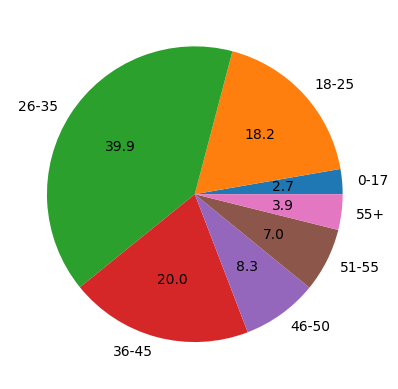

In [19]:
df.groupby('Age').size().plot(kind = 'pie', autopct = '%0.1f')

Multi column analysis

<Axes: xlabel='Age', ylabel='count'>

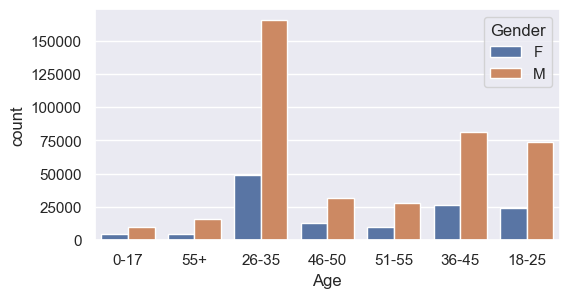

In [20]:
sns.set(rc = {'figure.figsize' : (6,3)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

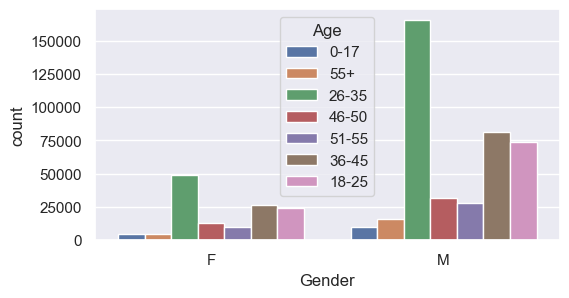

In [21]:
sns.set(rc = {'figure.figsize' : (6,3)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

<Axes: xlabel='Gender', ylabel='count'>

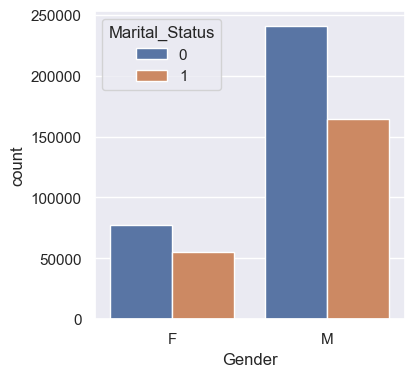

In [22]:
sns.set(rc = {'figure.figsize' : (4,4)})
sns.countplot(x = "Gender", hue = 'Marital_Status', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

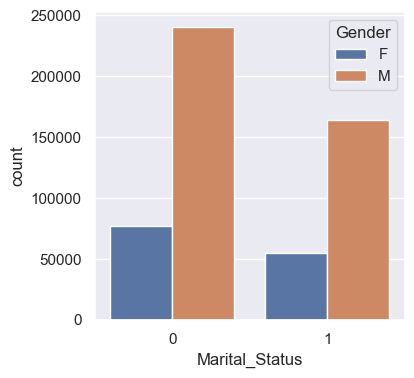

In [23]:
sns.set(rc = {'figure.figsize' : (4,4)})
sns.countplot(x = "Marital_Status", hue = 'Gender', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

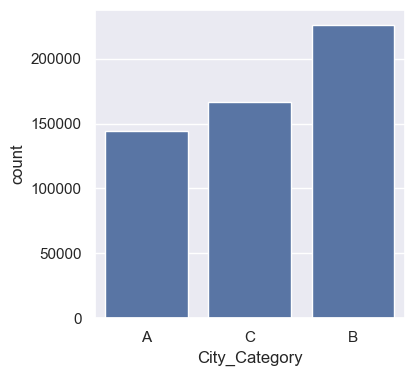

In [24]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

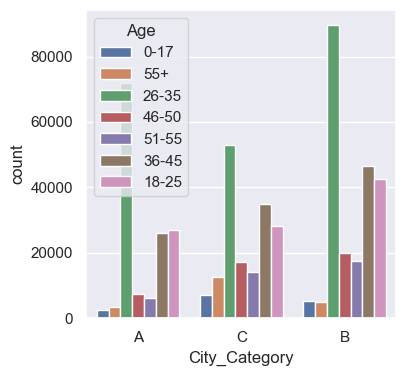

In [25]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

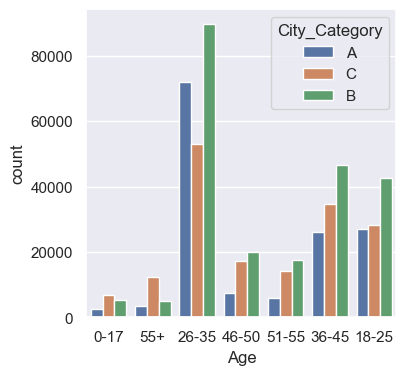

In [26]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

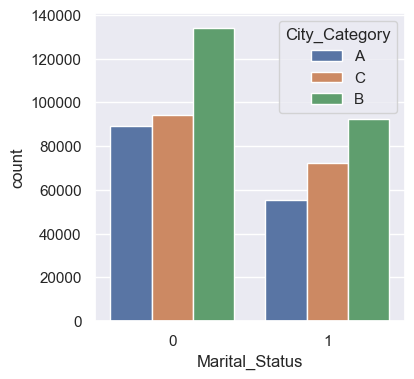

In [27]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<Axes: >

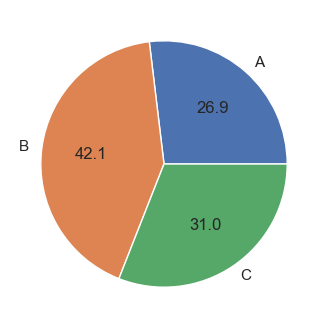

In [28]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='City_Category', ylabel='count'>

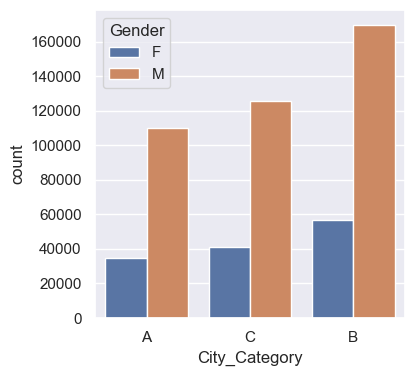

In [29]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)